In [52]:
# Garch
import yfinance as yf
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

In [53]:
# Descargar los datos de Yahoo Finance
df = yf.download('^NDX', start='2020-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [54]:
# calcular los retornos logaritmicos
df['Returns'] = 100 * df['Close'].pct_change()

In [55]:
# Eliminar los valores NaN en la columna de retornos
df = df.dropna()

In [56]:
# Crear el modelo Garch
model = arch_model(df['Returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124832366946.89633
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3976389077.3429193
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2277.2189643081665
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1824.020049043897
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1824.9208336977078
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1821.5976194701293
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1821.0405890702755
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1821.0404486920668
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1821.04044869184
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1821.0404486920668
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


In [57]:
garch_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1821.04
Distribution:                  Normal   AIC:                           3650.08
Method:            Maximum Likelihood   BIC:                           3669.73
                                        No. Observations:                 1005
Date:                Tue, Jan 07 2025   Df Residuals:                     1004
Time:                        17:30:04   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1080  4.348e-02      2.483  1.302e-02 [2.275e-02,  0.193]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0539  2.792e-02      1.931  5.351e-02 [-8.136e-04,  0.109]
alpha[1]       0.1264  2.843e-02      4.446  8.745e-06  [7.068e-02,  0.182]
beta[1]        0.8580  3.294e-02     26.048 1.406e-149    [  0.793,  0.923]
===========================================================================

Covariance estimator: robust
"""

In [58]:
# Hacer predicciones de volatilidad in-sample y out-of-sample (OOS)
# Predicciones in-sample
in_sample_forecast = garch_fit.conditional_volatility

In [59]:
# Predicciones out-of-sample (OOS)
oos_forecasts = garch_fit.forecast(horizon=10)
forecasted_variance = oos_forecasts.variance.iloc[-1]
forecasted_volatility_oos = forecasted_variance ** 0.5 # Volatilidad OOS

In [60]:
# Calcular la volatilidad histórica (rolling std de los retornos)
df['Historical Volatility'] = df['Returns'].rolling(window=30).std()

In [61]:
# Crear un rango de fechas para los próximos 10 dias (out-of-sample)
future_dates = pd.date_range(start=df.index[-1], periods=10, freq='B')

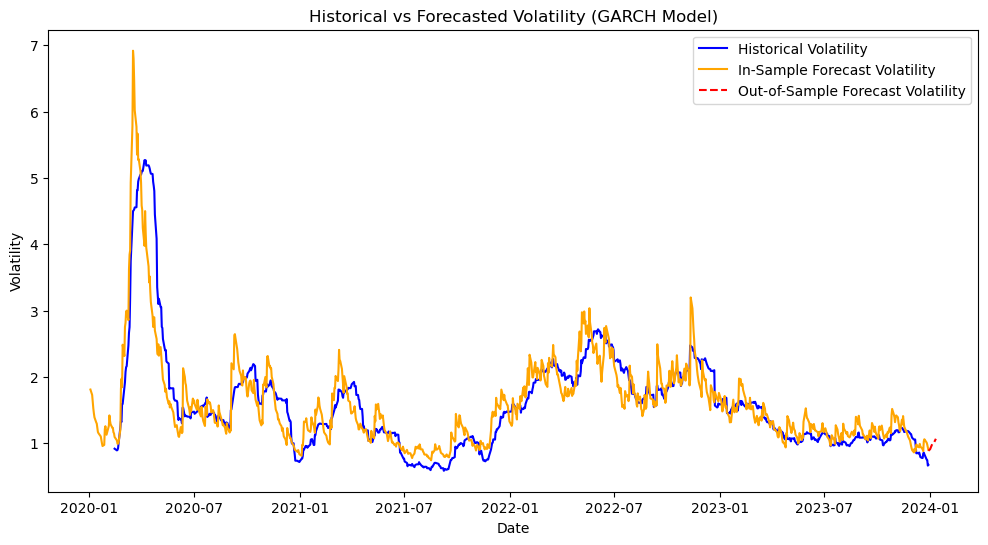

In [63]:
# Graficar la volatilidad histórica, in-sample y out-of-sample
plt.figure(figsize=(12, 6))

# Graficar la volatilidad historica
plt.plot(df.index, df['Historical Volatility'], label='Historical Volatility', color='blue')

# Graficar las predicciones in-sample
plt.plot(df.index, in_sample_forecast, label='In-Sample Forecast Volatility', color='orange')

# Graficar las predicciones out-of-sample (OOS)
plt.plot(future_dates, forecasted_volatility_oos, label='Out-of-Sample Forecast Volatility', linestyle='--', color='red')

# Añadir título y etiquetas
plt.title('Historical vs Forecasted Volatility (GARCH Model)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
